In [1]:
# %load ../start.py
# Load useful extensions

# Activate the autoreload extension for easy reloading of external packages
%reload_ext autoreload
%autoreload 2

# Trun on the water mark
%reload_ext watermark
%watermark -u -d -g

# Load ipycache extension
%reload_ext ipycache
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Add project library to path
import sys
sys.path.insert(0, '../../lib/python')

# The usual suspects
import os
import numpy as np
import pandas as pd

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('notebook')

# Turn off scientific notation
np.set_printoptions(precision=5, suppress=True)


last updated: 2017-06-05 
Git hash: 4cd447e8bb7b8a7871e543d2c95f0d52850eb22a


In [2]:
# Imports and settings
from ncbi_remap.parser import parse_picardCollect_hist

pd.options.display.max_columns = 999

In [4]:
# Connect to database
# %load ../../bin/load.py
from pymongo import MongoClient
with open('/home/fearjm/Projects/ncbi_remap/output/.mongodb_host', 'r') as fh:
    host = fh.read().strip()
client = MongoClient(host=host, port=27022)
db = client['sra2']
remap = db['remap']

In [5]:
# Import counts
with open('../../data/1104_s2_cell_in_mieg.txt', 'r') as fh:
    s2 = [x.strip() for x in fh]
    
with open('../../data/1508_s2_cell_brian_annot.txt', 'r') as fh:
    s2_2 = [x.strip() for x in fh]

In [7]:
remap.find({'runs.pre_aln_flags': 'complete'}).count(),  remap.find({'runs.srr': {'$in': s2 + s2_2}}).count()

(5466, 926)

1013


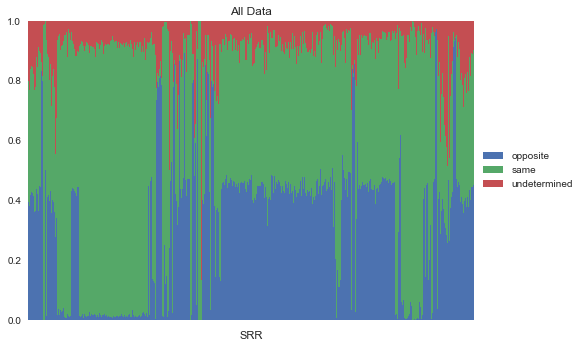

In [8]:
# Plot Strandedness all samples
agg = remap.aggregate([
    {'$unwind': '$runs'},
    {
            '$match': {
            'runs.srr': {'$in': s2},
            'runs.pre_aln_flags': 'complete'
        },
    },
    {
        '$project': {
            'srx': '$_id',
            'srr': '$runs.srr',
            'same': '$runs.pre_aln_workflow.infer_expeirment.same_strand',
            'opposite': '$runs.pre_aln_workflow.infer_expeirment.opposite_strand',
            'undetermined': '$runs.pre_aln_workflow.infer_expeirment.undertermined',
        }
    }
])

df = pd.DataFrame(list(agg))
df.set_index(['srx', 'srr'], inplace=True)

ax = df.plot.bar(stacked=True, width=1)
ax.set_xticklabels([]);
ax.set_xlabel('SRR');
ax.set_ylim([0,1]);
ax.legend(loc='center', bbox_to_anchor=(1.12, 0.5));
ax.set_title('All Data')
print(df.shape[0])

338


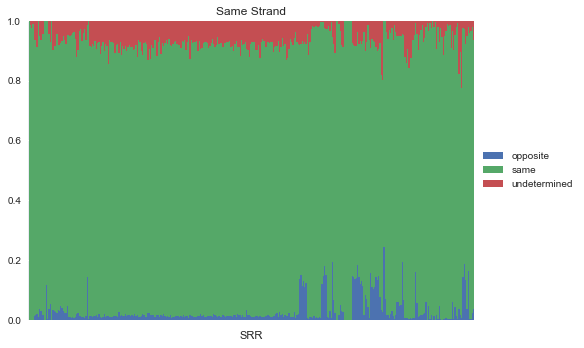

In [9]:
# Plot Strandedness same strand samples
agg = remap.aggregate([
    {'$unwind': '$runs'},
    {
            '$match': {
            'runs.pre_aln_flags': 'complete',
            'runs.srr': {'$in': s2},
            'runs.pre_aln_flags': 'same_strand'
        },
    },
    {
        '$project': {
            'srx': '$_id',
            'srr': '$runs.srr',
            'same': '$runs.pre_aln_workflow.infer_expeirment.same_strand',
            'opposite': '$runs.pre_aln_workflow.infer_expeirment.opposite_strand',
            'undetermined': '$runs.pre_aln_workflow.infer_expeirment.undertermined',
        }
    }
])

df = pd.DataFrame(list(agg))
df.set_index(['srx', 'srr'], inplace=True)

ax = df.plot.bar(stacked=True, width=1)
ax.set_xticklabels([]);
ax.set_xlabel('SRR');
ax.set_ylim([0,1]);
ax.legend(loc='center', bbox_to_anchor=(1.12, 0.5));
ax.set_title('Same Strand')
print(df.shape[0])

74


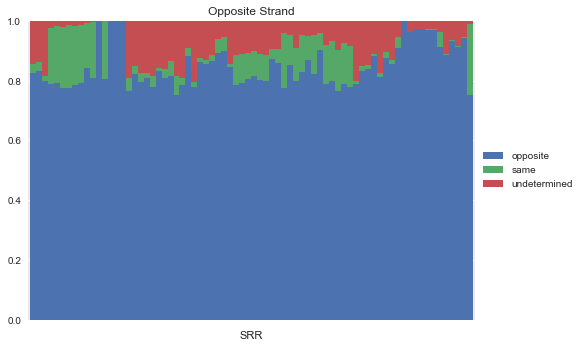

In [10]:
# Plot Strandedness opposite strand samples
agg = remap.aggregate([
    {'$unwind': '$runs'},
    {
            '$match': {
            'runs.pre_aln_flags': 'complete',
            'runs.srr': {'$in': s2},
            'runs.pre_aln_flags': 'opposite_strand'
        },
    },
    {
        '$project': {
            'srx': '$_id',
            'srr': '$runs.srr',
            'same': '$runs.pre_aln_workflow.infer_expeirment.same_strand',
            'opposite': '$runs.pre_aln_workflow.infer_expeirment.opposite_strand',
            'undetermined': '$runs.pre_aln_workflow.infer_expeirment.undertermined',
        }
    }
])

df = pd.DataFrame(list(agg))
df.set_index(['srx', 'srr'], inplace=True)

ax = df.plot.bar(stacked=True, width=1)
ax.set_xticklabels([]);
ax.set_xlabel('SRR');
ax.set_ylim([0,1]);
ax.legend(loc='center', bbox_to_anchor=(1.12, 0.5));
ax.set_title('Opposite Strand')
print(df.shape[0])

653


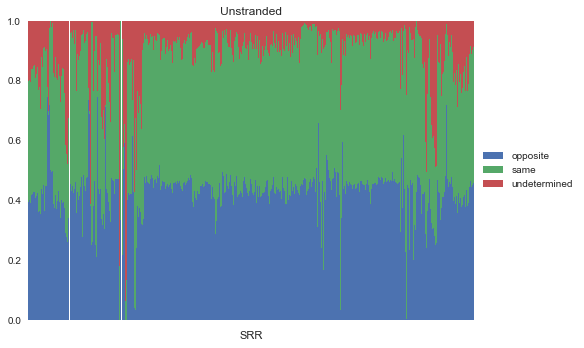

In [11]:
# Plot Strandedness unstranded samples
agg = remap.aggregate([
    {'$unwind': '$runs'},
    {
            '$match': {
            'runs.pre_aln_flags': 'complete',
            'runs.srr': {'$in': s2},
            'runs.pre_aln_flags': 'unstranded'
        },
    },
    {
        '$project': {
            'srx': '$_id',
            'srr': '$runs.srr',
            'same': '$runs.pre_aln_workflow.infer_expeirment.same_strand',
            'opposite': '$runs.pre_aln_workflow.infer_expeirment.opposite_strand',
            'undetermined': '$runs.pre_aln_workflow.infer_expeirment.undertermined',
        }
    }
])

df = pd.DataFrame(list(agg))
df.set_index(['srx', 'srr'], inplace=True)

ax = df.plot.bar(stacked=True, width=1)
ax.set_xticklabels([]);
ax.set_xlabel('SRR');
ax.set_ylim([0,1]);
ax.legend(loc='center', bbox_to_anchor=(1.12, 0.5));
ax.set_title('Unstranded')
print(df.shape[0])

In [15]:
agg = remap.aggregate([
    {'$unwind': '$runs'},
    {
        '$match': {
            'runs.pre_aln_flags': 'complete', 
            'runs.srr': {'$in': s2},
            'runs.pre_aln_flags': 'same_strand',
            'runs.pre_aln_workflow.picard_collectrnaseqmetrics': {'$exists': 1}
        }
    },
    {
        '$project': {
            '_id': 0,
            'srx': '$_id',
            'srr': '$runs.srr',
            'metrics': '$runs.pre_aln_workflow.picard_collectrnaseqmetrics'
        }
    },
])

records = []
for record in agg:
    r = {}
    r['srx'] = record['srx']
    r['srr'] = record['srr']
    for k, v in record['metrics']['first'].items():
        r[k] = v
    records.append(r)

metrics = pd.DataFrame(records)
metrics.set_index(['srx', 'srr'], inplace=True)

In [16]:
dfs = []
for srx, srr in metrics.index.tolist():
    try:
        fname = '../../output/prealignment/raw/{srx}/{srr}/{srr}.hisat2.bam.FIRST_READ_TRANSCRIPTION_STRAND.picard.collectrnaseqmetrics'.format(srx=srx, srr=srr)
        pic =  parse_picardCollect_hist(srr, fname)
        dfs.append(pic)
    except FileNotFoundError:
        print(srx, srr)

hists = pd.concat(dfs)

SRX765642 SRR1659988
SRX765641 SRR1659987


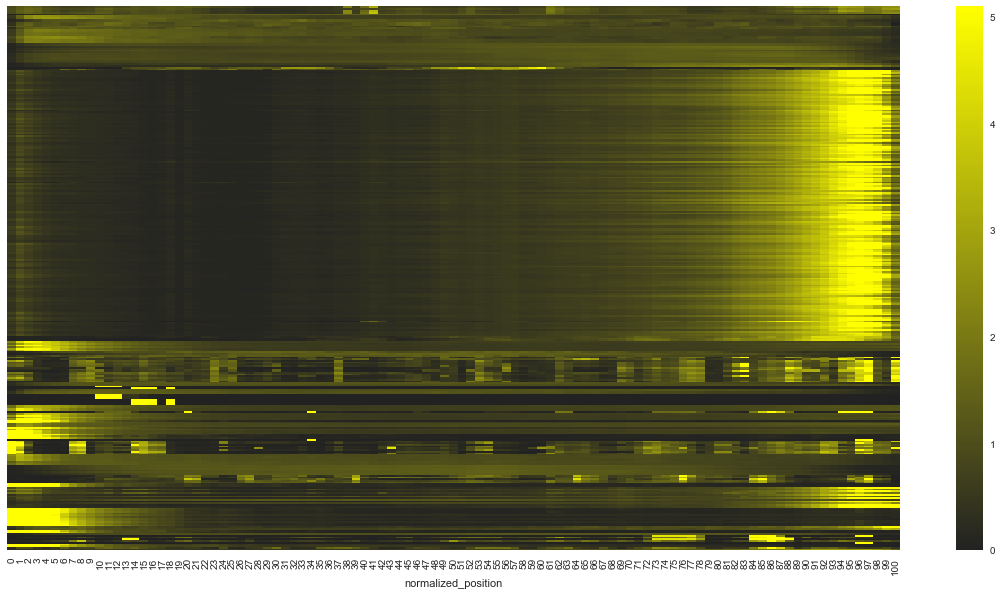

In [19]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(hists, yticklabels=False, robust=True, cmap=sns.dark_palette('yellow', as_cmap=True));

In [23]:
bo = pd.read_excel('../../data/brian/20170428_s2cell_1243bo.xlsx', header=(0, 1))
bo.head()

author                                           \
             adapter_sequences  age agent amplification_cycles antibodu   
id                                                                        
SAMN01760715               NaN  NaN   NaN                  NaN      NaN   
SAMN01760700               NaN  NaN   NaN                  NaN      NaN   
SAMN01760718               NaN  NaN   NaN                  NaN      NaN   
SAMN01760717               NaN  NaN   NaN                  NaN      NaN   
SAMN01760704               NaN  NaN   NaN                  NaN      NaN   

                                                                     \
             antibody antibody_catalog_number antibody_manufacturer   
id                                                                    
SAMN01760715      NaN                     NaN                   NaN   
SAMN01760700      NaN                     NaN                   NaN   
SAMN01760718      NaN                     NaN                   NaN   
SAMN01760717      NaN                     NaN                   NaN   
SAMN01760704      NaN                     NaN                   NaN   

                                                            \
             antibody_name assay barcode biological_repeat   
id                                                           
SAMN01760715           NaN   NaN     NaN               NaN   
SAMN01760700           NaN   NaN     NaN               NaN   
SAMN01760718           NaN   NaN     NaN               NaN   
SAMN01760717           NaN   NaN     NaN               NaN   
SAMN01760704           NaN   NaN     NaN               NaN   

                                                               \
             biomaterial_provider biorep biosamplemodel breed   
id                                                              
SAMN01760715                  NaN    NaN            NaN   NaN   
SAMN01760700                  NaN    NaN            NaN   NaN   
SAMN01760718                  NaN    NaN            NaN   NaN   
SAMN01760717                  NaN    NaN            NaN   NaN   
SAMN01760704                  NaN    NaN            NaN   NaN   

                                                                   \
             bru_immunoprecipitation cell_cycle_profile cell_line   
id                                                                  
SAMN01760715                     NaN                NaN       NaN   
SAMN01760700                     NaN                NaN       NaN   
SAMN01760718                     NaN                NaN       NaN   
SAMN01760717                     NaN                NaN       NaN   
SAMN01760704                     NaN                NaN       NaN   

                                                                       \
             cell_line_background cell_passages cell_source cell_type   
id                                                                      
SAMN01760715                  NaN           NaN         NaN        S2   
SAMN01760700                  NaN           NaN         NaN        S2   
SAMN01760718                  NaN           NaN         NaN        S2   
SAMN01760717                  NaN           NaN         NaN        S2   
SAMN01760704                  NaN           NaN         NaN        S2   

                                                           \
             celll_line cellline cells cells_derived_from   
id                                                          
SAMN01760715        NaN      NaN   NaN                NaN   
SAMN01760700        NaN      NaN   NaN                NaN   
SAMN01760718        NaN      NaN   NaN                NaN   
SAMN01760717        NaN      NaN   NaN                NaN   
SAMN01760704        NaN      NaN   NaN                NaN   

                                                                             \
                                    chip_antibody chip_antibody_information   
id                                                 

In [32]:
boFlags = bo.loc[:, ('oliver', 'notes_and_flags')].dropna()

In [90]:
mRNA_sample = boFlags[boFlags.str.lower().str.contains('mrna') | boFlags.str.lower().str.contains('rnaseq')].index.tolist()
chip_sample = boFlags[boFlags.str.lower().str.contains('chip')].index.tolist()
star_sample = boFlags[boFlags.str.lower().str.contains('star')].index.tolist()
miRNA_sample = boFlags[boFlags.str.lower().str.contains('mirna')].index.tolist()

In [108]:
def get_srr(samples):
    agg = remap.aggregate([
        {'$unwind': '$runs'},
        {
            '$match': {
                #'runs.pre_aln_flags': 'complete',
                #'runs.srr': {'$in': s2},
                'sample.biosample': {'$in': samples}      
            }
        },
        {
            '$project': {
                '_id': 0,
                'srr': '$runs.srr'
            }
        },
    ])

    return list(set([x['srr'] for x in agg]))

In [102]:
mRNA = get_srr(mRNA_sample)
chip = get_srr(chip_sample)
star = get_srr(star_sample)
miRNA = get_srr(miRNA_sample)

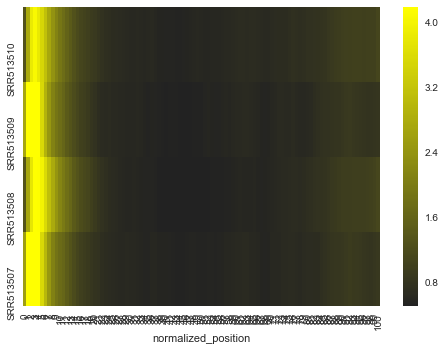

In [103]:
sns.heatmap(hists[hists.index.isin(chip)], robust=True, cmap=sns.dark_palette('yellow', as_cmap=True))

In [109]:
all_srr = get_srr(bo.index.tolist())

In [110]:
len(all_srr)

1508

In [107]:
len(s2)

1104

In [111]:
all_srr

['SRR513507',
 'SRR074550',
 'SRR015104',
 'SRR1821775',
 'SRR638068',
 'SRR3232008',
 'SRR345569',
 'SRR2016888',
 'SRR833687',
 'SRR641383',
 'SRR638050',
 'SRR638060',
 'SRR031771',
 'SRR074537',
 'SRR1586028',
 'SRR3996486',
 'SRR2919858',
 'SRR1566272',
 'SRR1659985',
 'SRR1586036',
 'SRR3203821',
 'SRR074525',
 'SRR585053',
 'SRR2131646',
 'SRR1503611',
 'SRR074498',
 'SRR641380',
 'SRR1640737',
 'SRR1297289',
 'SRR544877',
 'SRR585051',
 'SRR3068947',
 'SRR1521303',
 'SRR121529',
 'SRR946214',
 'SRR542429',
 'SRR074485',
 'SRR2173468',
 'SRR3068925',
 'SRR4040079',
 'SRR074435',
 'SRR086197',
 'SRR1659990',
 'SRR3068934',
 'SRR424188',
 'SRR074493',
 'SRR408556',
 'SRR638052',
 'SRR3671204',
 'SRR031782',
 'SRR3042568',
 'SRR121540',
 'SRR773312',
 'SRR074439',
 'SRR031779',
 'SRR3018852',
 'SRR074542',
 'SRR030174',
 'SRR2038263',
 'SRR1660005',
 'SRR1957065',
 'SRR580345',
 'SRR1943036',
 'SRR054717',
 'SRR3546396',
 'SRR3177678',
 'SRR1640743',
 'SRR065812',
 'SRR585044',
 'S

In [112]:
with open('../../data/1508_s2_cell_brian_annot.txt', 'w') as fh:
    fh.write('\n'.join(all_srr))